In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shark-attack-dataset/list_coor_australia.csv
/kaggle/input/shark-attack-dataset/attacks.csv
/kaggle/input/flagsy/us-flag.webp
/kaggle/input/flagsy/nz-flag.gif
/kaggle/input/flagsy/pp-flag.gif
/kaggle/input/flagsy/as-flag.webp
/kaggle/input/flagsy/sf-flag.gif


In [2]:
shark = pd.read_csv('../input/shark-attack-dataset/attacks.csv')

In [3]:
shark.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
shark.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
shark = pd.DataFrame(shark)
shark['Sex '].value_counts()

M      5094
F       637
N         2
M         2
lli       1
.         1
Name: Sex , dtype: int64

In [6]:
sharka = shark.groupby(['Sex ', 'Fatal (Y/N)'],as_index=False).size()
sharka = sharka.sort_values(by=['size'], ascending=False)
sharka = sharka[0:7]
sharka.drop([5],inplace=True)

In [7]:
sharka.drop([3],inplace=True)
sharka.drop([9],inplace=True)
sharka.head()

,Sex,Fatal (Y/N),size
8,M,N,3474
10,M,Y,1172
2,F,N,467
4,F,Y,107


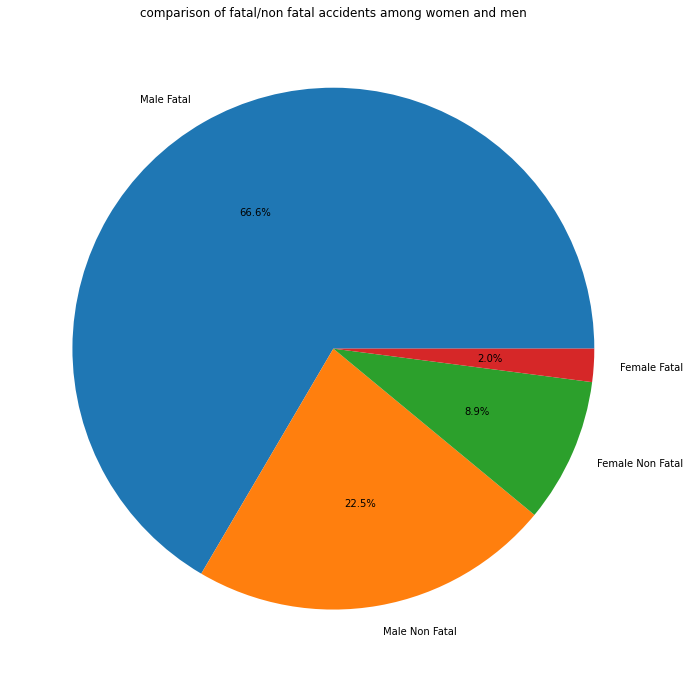

In [8]:
import matplotlib.pyplot as plt
mlabels=['Male Fatal','Male Non Fatal','Female Non Fatal','Female Fatal']
plt.pie(sharka['size'],labels=mlabels,autopct='%1.1f%%')
plt.title('comparison of fatal/non fatal accidents among women and men')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [9]:
import plotly.express as px
fig = px.pie(sharka, names=mlabels,values='size',hole = 0.8)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(
    annotations=[dict(text="comparison of accidents", x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.update_layout(showlegend=False)

In [10]:
shark.dropna(subset = ["Activity"], inplace=True)

# **The image is based on the most common words, but the most common activities that are accompanied by shark attacks can be seen here**

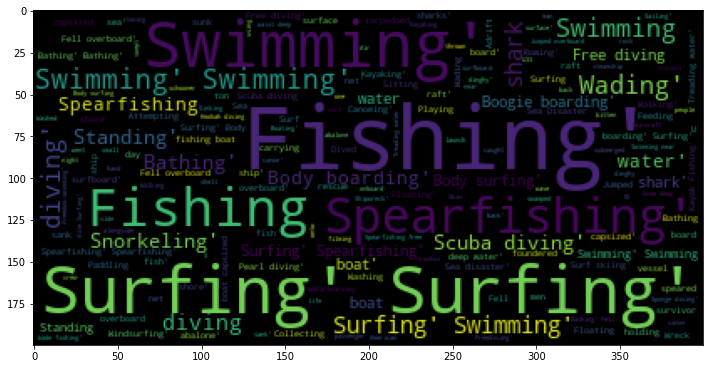

In [11]:
from wordcloud import WordCloud
words=shark['Activity'].tolist()
words=''.join(str(words))
plt.figure(figsize=(12,12))
plt.imshow(WordCloud().generate(words))

In [12]:
sharkb = shark.groupby(['Country'],as_index=False).size()
sharkb = sharkb.sort_values(by=['size'], ascending=False)


In [13]:
import plotly.express as px

px.choropleth(sharkb, 
              locations = 'Country',
              color="size", 
              color_continuous_scale="Turbo",
              locationmode='country names',
              scope="world",
              range_color=(0, 2000),
              title='',
              height=600
             )

<AxesSubplot:title={'center':'top 5 countries with the most shark attacks'}, xlabel='Country', ylabel='size'>

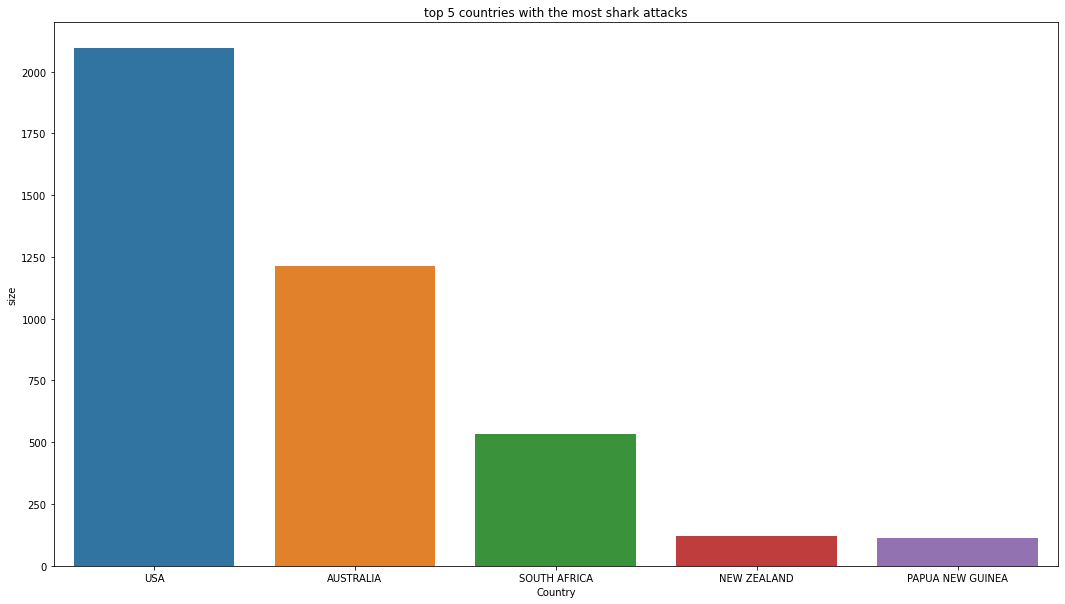

In [14]:
import seaborn as sns
sharkb = sharkb[0:5]
plt.figure(figsize=(18,10))
plt.title('top 5 countries with the most shark attacks')
sns.barplot(x='Country',y='size',data=sharkb)


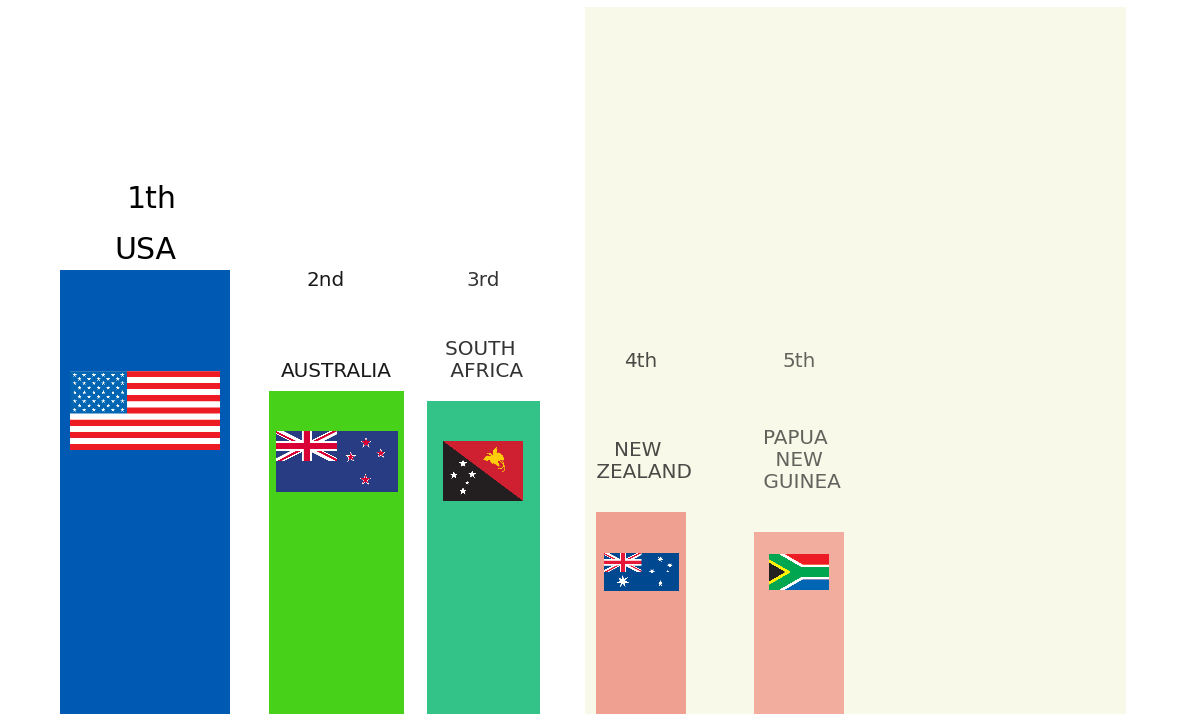

In [15]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
fig, ax = plt.subplots(figsize=(21,13), facecolor="w")
def make_img(img,zoom, x, y):
    img = mpimg.imread(img)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x,y),frameon=False)
    ax.add_artist(ab)
img_path =os.listdir('../input/flagsy')
img_file = [img_path[0],img_path[1],img_path[2],img_path[3],img_path[4]]
zoom = [0.3,0.2,0.2,0.15,0.12]
img_y= [3.0,2.5,2.4,1.4,1.4]
name = ['USA','AUSTRALIA','SOUTH \n AFRICA','NEW \n ZEALAND','PAPUA \n NEW \n GUINEA']
name_pos = [4.45,3.3,3.3,2.3,2.2]
char = ['1th','2nd','3rd','4th','5th']
y_char = [4.95,4.2,4.2,3.4,3.4]
x_char = [1.03,1.8,2.5,3.2,3.9]
fontsize = [60,50,50,50,50]
width = [0.75,0.6,0.5,0.4,0.4]
alpha = [1, 0.9, 0.8, 0.7, 0.6]
x = [1.0,1.85,2.5,3.2,3.90]
y = [4.4,3.2,3.1,2.0,1.8]
color = ['#0059b3','#33cc00','#00b36b','#e60000','#e60000']
for i in range(5):
    make_img(f'../input/flagsy/{img_file[i]}',zoom[i], x[i], img_y[i])
    plt.bar(x=x[i],height=y[i],width=width[i],color=color[i],alpha=alpha[i])
    plt.text(s=char[i],x=x_char[i],y = y_char[i],va='bottom',ha='center',font='Comic Sans MS',fontsize = fontsize[i]-30,alpha=alpha[i])
    plt.text(s=name[i],x=x[i],y=name_pos[i],va='bottom',ha='center',font='Comic Sans MS',fontsize = fontsize[i]-30,alpha=alpha[i])

    
ax.axvspan(xmin = 2.95,xmax= 5.35, fc='#F4F4D6', alpha=0.5)

plt.ylim(0, 7)
plt.axis('off')
plt.show()

In [16]:
sharkc = shark.groupby(['Species '],as_index=False).size()
sharkc = sharkc.sort_values(by=['size'], ascending=False)
sharkc.drop([783,1033,1045,1044,409,480,152,109,941,943,87,350,454,411,231,324],inplace=True)
sharkc = sharkc[0:4]

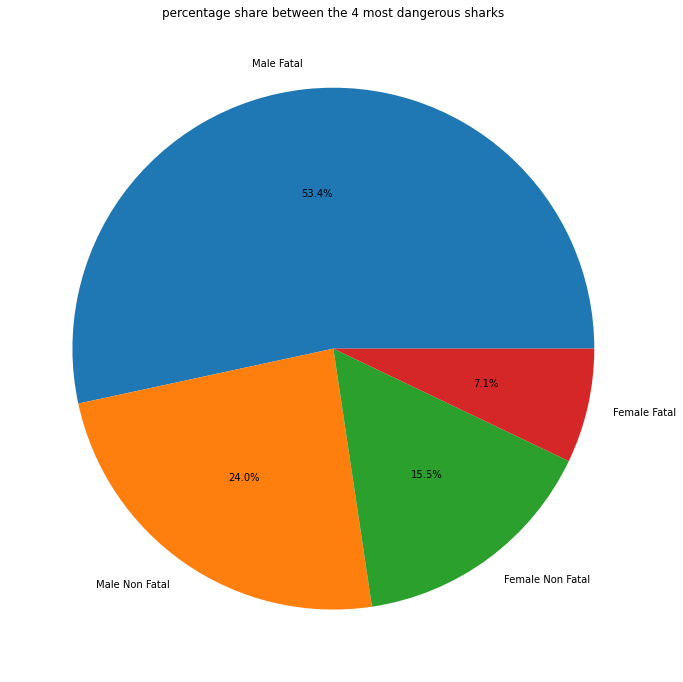

In [17]:
mlabels2=['White shark','Tiger shark','Bull shark','Wobbegong shark']
plt.pie(sharkc['size'],labels=mlabels,autopct='%1.1f%%')
plt.title('percentage share between the 4 most dangerous sharks')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [18]:
import plotly.express as px
fig = px.pie(sharkc, names=mlabels2,values='size',hole = 0.8)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(
    annotations=[dict(text="comparison of sharks", x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.update_layout(showlegend=False)

# White Shark
![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/Great_White_Shark_%2814730723649%29.jpg/800px-Great_White_Shark_%2814730723649%29.jpg)
# Tiger Shark
![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Tiger_shark.jpg/240px-Tiger_shark.jpg)
# Bull Shark
![](https://healthyorganic.co.za/wp-content/uploads/2021/05/gargantuan-bull-shark-bares-its-rows-of-teeth-in-terrifying-close-encounter-with-free-diver-off-florida.jpg)
# Wobbegong shark
![](https://www.naturepl.com/cache/pcache2/01520117.jpg)

**Informations about sharks:**
* https://en.wikipedia.org/wiki/Great_white_shark
* https://en.wikipedia.org/wiki/Tiger_shark
* https://en.wikipedia.org/wiki/Bull_shark
* https://en.wikipedia.org/wiki/Wobbegong